<a href="https://colab.research.google.com/github/gguillaux/ml_python/blob/master/fiap_modelos_de_ia_e_ml_exercicio_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício #6

Utilizando o dataset Mushroom Classification (disponível no repositório
da disciplina e em https://www.kaggle.com/uciml/mushroom-classification
construa um classificador Naive Bayes (Gaussiano ou não) que
classifique as amostras em cogumelos comestíveis ou não.
Avalie as características do problema para eliminar as que não agregam
capacidade decisória ao classificador.
Avalie a precisão, acurácia do classificador. Verifique o tempo de
execução.

## Importacao de bibliotecas

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from google.colab import drive
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BaseNB, CategoricalNB

In [84]:
#4/0gG8sz6V93VRzczPKjk3YL0T2JLy6yFNoZoVtd5v0W0xVfCAkgV9U6Q
drive.mount('/drive', force_remount=False)

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


*Attribute* Information: (classes: edible=e, poisonous=p)

    cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

    cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

    cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

    bruises: bruises=t,no=f

    odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

    gill-attachment: attached=a,descending=d,free=f,notched=n

    gill-spacing: close=c,crowded=w,distant=d

    gill-size: broad=b,narrow=n

    gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

    stalk-shape: enlarging=e,tapering=t

    stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

    stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    veil-type: partial=p,universal=u

    veil-color: brown=n,orange=o,white=w,yellow=y

    ring-number: none=n,one=o,two=t

    ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

    spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

    population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

    habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [85]:
mush = pd.read_csv('/drive/My Drive/fiap/datasets/mushrooms.csv')
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [86]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## Observacao
Todas as colunas possuem dados categoricos. Vamos plotar para ver a distribuicao de cada valor ao longo de todo o dataset.

23it [00:00, 56.48it/s]


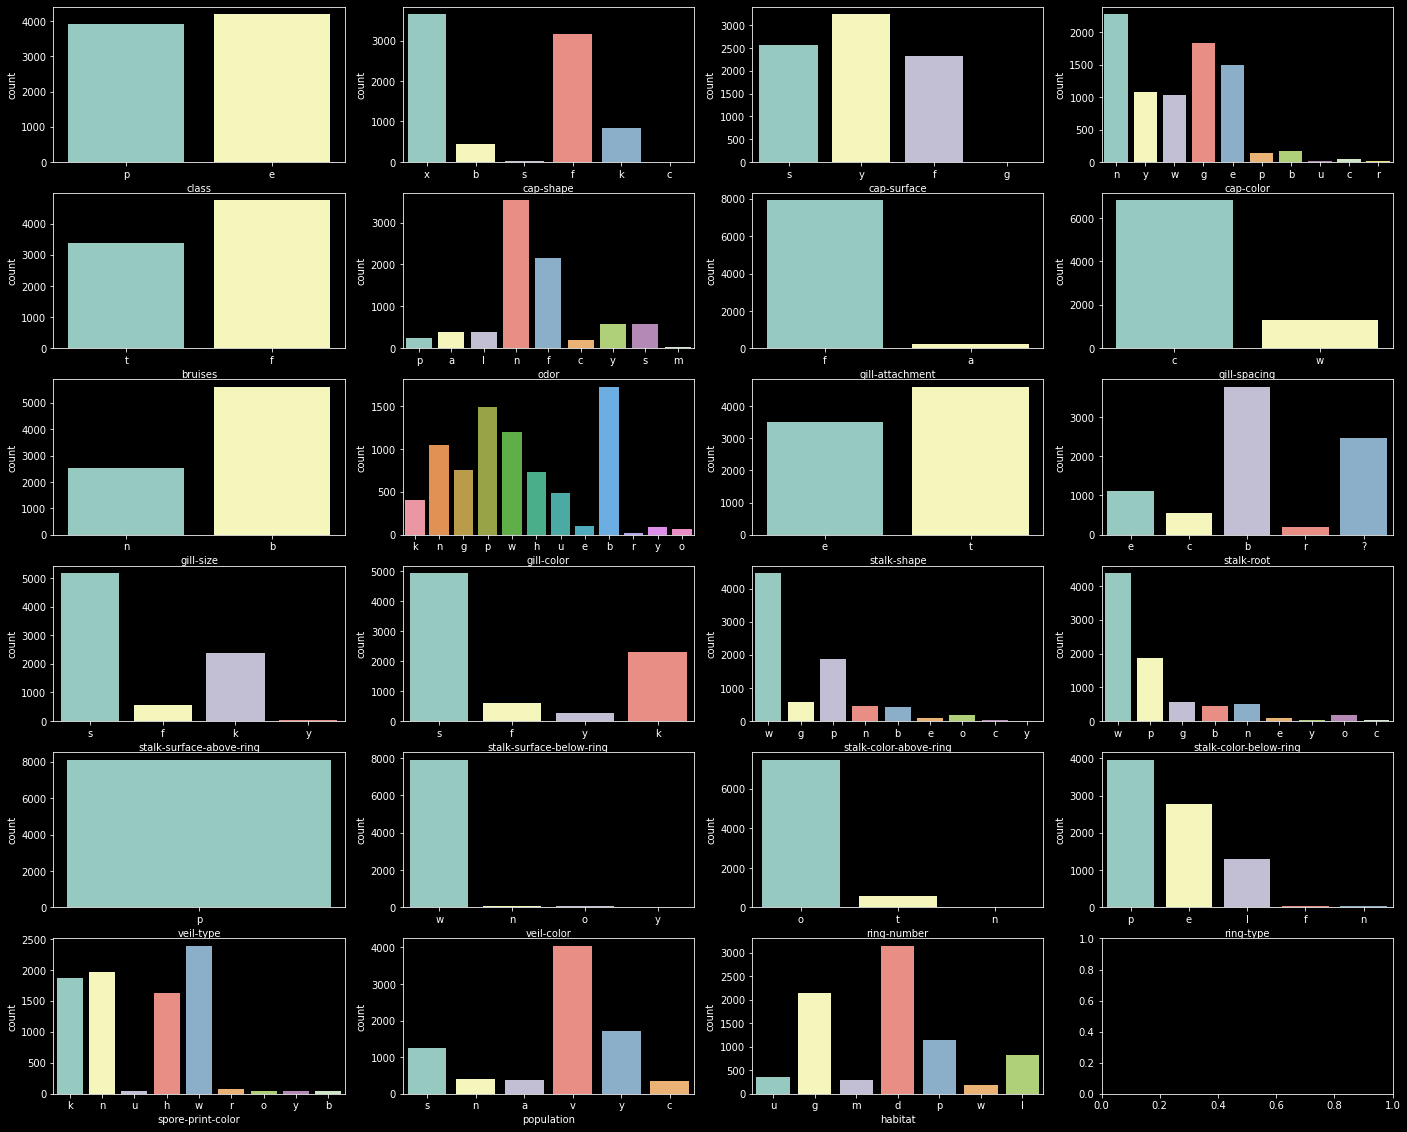


DataFrame with one-hot encoding migh have 117 variables


In [87]:
# set matplolib style
plt.style.use('dark_background')

# create subplots to plot a matrix of countplots 
# since all variables above seems to be categorical
fig, ax = plt.subplots(nrows=6, ncols=4)
fig.set_size_inches(24, 20)
variables = 0

# plot each column
for i, col in tqdm(enumerate(mush.columns)):
    if i != 0: # skip first column that is the label
        variables += len(mush[col].unique()) # sum totals to antecipate total cols of onehot encoding
    c = i % 4    # get column index of the plot
    r = i // 4      # get row index of the plot
    sns.countplot(col, data=mush, ax=ax[r, c])
plt.show()
print('\nDataFrame with one-hot encoding migh have {} variables'.format(variables))

## Separacao de features e label e primeiro treinamento

In [88]:
label = mush['class']
features = pd.get_dummies(mush.drop('class', axis=1))
features.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


## Primeiro treinamento com naive bayes gaussiano, sem estratificacao

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    label, 
                                                    random_state=42, 
                                                    test_size=0.2)

In [90]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
print('First scores without stratification')
print('Train Score \t= {}'.format(bayes.score(X_train, y_train)))
print('Test Score \t= {}'.format(bayes.score(X_test, y_test)))

First scores without stratification
Train Score 	= 0.9655331589475303
Test Score 	= 0.96


## Segundo treinamento com naive bayes gaussiano, com estratificacao

In [91]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    label, 
                                                    random_state=42, 
                                                    test_size=0.2,
                                                    stratify=label) # estratificao
bayes = GaussianNB()
bayes.fit(X_train, y_train)
print('Second scores wtih stratification')
print('Train Score \t= {}'.format(bayes.score(X_train, y_train)))
print('Confusion matrix with train data = \n{}'.format(confusion_matrix(y_train, bayes.predict(X_train))))
print('Test Score \t= {}'.format(bayes.score(X_test, y_test)))
print('Confusion matrix with test data = \n{}'.format(confusion_matrix(y_test, bayes.predict(X_test))))

Second scores wtih stratification
Train Score 	= 0.956916448684413
Confusion matrix with train data = 
[[3087  279]
 [   1 3132]]
Test Score 	= 0.9618461538461538
Confusion matrix with test data = 
[[782  60]
 [  2 781]]


#### Modelo performa melhor nos casos de teste se adicionarmos o parametro de estratificacao para segregar o conjunto de testes de acordo com segmentacao do label. Como nosso objetivo e classificar se os cogumelos sao comestiveis ou nao, estratificar melhor nosso conjunto de treinamento e teste ajuda na generalizacao do algoritmo

In [0]:
bayes_models = {
    'gauss' : GaussianNB,
    'cat' : CategoricalNB
}

def custom_split(X, y):
    return train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)


def show_score_with_n_variables(df, cols, model):
    label = df['class']
    features = pd.get_dummies(df.drop(cols, axis=1))
    X_train, X_test, y_train, y_test = custom_split(features, label)
    bayes = bayes_models[model]()
    bayes.fit(X_train, y_train)
    tr_score = bayes.score(X_train, y_train)
    ts_score = bayes.score(X_test, y_test)
    
    print('Score with {} variables removed and {} model'.format(len(cols), model))
    print('Train Score \t= {}'.format(tr_score))
    print('Confusion matrix with train data = \n{}'.format(confusion_matrix(y_train, bayes.predict(X_train))))
    print('Test Score \t= {}'.format(ts_score))
    print('Confusion matrix with test data = \n{}'.format(confusion_matrix(y_test, bayes.predict(X_test))))
    print('\n\n')
    return (tr_score, ts_score, bayes, X_test, y_test)

## Selecao de caracteristicas
Vamos remover as colunas que tem atributos nao muito bem distribuidos ou excessivamente concentrados em um unico valor.
A remocao destas caracteristicas deve ajudar remocao de vies e generalizacao do algoritmo.

In [93]:
cols = ['class','veil-type', 'veil-color']
print('Removed features = {}'.format(cols))
for model in bayes_models.keys():
    _ = show_score_with_n_variables(mush, cols, model)
print('=' * 60)


cols = ['class','veil-type', 'veil-color', 'ring-number']
print('\nRemoved features = {}'.format(cols))
for model in bayes_models.keys():
    _ = show_score_with_n_variables(mush, cols, model)
print('=' * 60)


cols = ['class','veil-type', 'veil-color', 'ring-number', 'gill-attachment']
print('\nRemoved features = {}'.format(cols))
for model in bayes_models.keys():
    _ = show_score_with_n_variables(mush, cols, model)
print('=' * 60)

Removed features = ['class', 'veil-type', 'veil-color']
Score with 3 variables removed and gauss model
Train Score 	= 0.9909216802585014
Confusion matrix with train data = 
[[3308   58]
 [   1 3132]]
Test Score 	= 0.9901538461538462
Confusion matrix with test data = 
[[828  14]
 [  2 781]]



Score with 3 variables removed and cat model
Train Score 	= 0.942606554854593
Confusion matrix with train data = 
[[3327   39]
 [ 334 2799]]
Test Score 	= 0.9323076923076923
Confusion matrix with test data = 
[[829  13]
 [ 97 686]]




Removed features = ['class', 'veil-type', 'veil-color', 'ring-number']
Score with 4 variables removed and gauss model
Train Score 	= 0.972918910601631
Confusion matrix with train data = 
[[3191  175]
 [   1 3132]]
Test Score 	= 0.9692307692307692
Confusion matrix with test data = 
[[794  48]
 [  2 781]]



Score with 4 variables removed and cat model
Train Score 	= 0.9406062471149408
Confusion matrix with train data = 
[[3320   46]
 [ 340 2793]]
Test Score 	= 0.9310

### Conclusao
Para este problema, o modelo Gaussiano removendo, alem do label (class), outras tres variaveis relacionadas ao veil (mucosa ou tipo de membrana que envolve o cogumelo), que pela analise visual acime se mostrou extremamente concentrada, ajudou a levar tanto a acuracia de treino quanto a acuracia de teste a 99%.

Vale destacar que outro tuning inserido foi o uso do parametro stratify na hora de separar os conjuntos de teste e treino. Com essa configuracao final obtimos tambem a menor taxa de predicao de falsos positivos e falsos negativos.

In [106]:
# best setup
cols = ['class','veil-type', 'veil-color']
print('Removed features = {}'.format(cols))
*_, model, x, y = show_score_with_n_variables(mush, cols, 'gauss')

Removed features = ['class', 'veil-type', 'veil-color']
Score with 3 variables removed and gauss model
Train Score 	= 0.9909216802585014
Confusion matrix with train data = 
[[3308   58]
 [   1 3132]]
Test Score 	= 0.9901538461538462
Confusion matrix with test data = 
[[828  14]
 [  2 781]]





In [107]:
print('Classification report')
print(classification_report(y, model.predict(x), target_names=y.unique()))

Classification report
              precision    recall  f1-score   support

           p       1.00      0.98      0.99       842
           e       0.98      1.00      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

